<a href="https://colab.research.google.com/github/zzhu104/MAT494_HW/blob/main/HW3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 3.2 Calculus - Review

Here, we provide some examples of calculus.

More examples: https://scipy-lectures.org/packages/sympy.html

Copyright:

1 Calculate limits using Sympy

In [1]:
# import library
import sympy as sym

# pythonic math expressions: add spaces, use single quotes and lowercases
# declaring variables
x, y, z, a, b, c = sym.symbols('x, y, z, a, b, c')

f = sym.sin(x) / x
print(sym.limit(f, x, 0))

n = sym.symbols('n')
print(sym.limit(((n + 3) / (n + 2)) ** n, n, sym.oo)) # oo is mathematical infinity

1
E


2.1 Calculate derivatives

In [2]:
# declaring variables
x, y, z, a, b, c = sym.symbols('x, y, z, a, b, c')

# we take the derivative using diff
# diff (function, independent variable, number of derivatives)

exp1 = sym.diff(sym.sin(2 * x), x) 
print('1st derivative w.r.t x: ', exp1) 

exp2 = sym.diff(sym.sin(2*x), x, 2) 
print('2nd derivative w.r.t x: ', exp2) 

exp3 = sym.diff(sym.sin(2*x), x, 3)
print('3rd derivative w.r.t x: ', exp3) 

exp4 = sym.diff(sym.sin(x*y), x, 2, y, 3) 
print('\n', exp4)

1st derivative w.r.t x:  2*cos(2*x)
2nd derivative w.r.t x:  -4*sin(2*x)
3rd derivative w.r.t x:  -8*cos(2*x)

 x*(x**2*y**2*cos(x*y) + 6*x*y*sin(x*y) - 6*cos(x*y))


In [3]:
# notice the difference of the output format
sym.diff(sym.exp(-x) * sym.cos(3 - x))

-exp(-x)*sin(x - 3) - exp(-x)*cos(x - 3)

2.2 Lambda Calculus

In [4]:
x = sym.symbols('x')
f = x ** 4 + 7 * x ** 3 + 5 * x ** 2 - 17 * x + 3
f

x**4 + 7*x**3 + 5*x**2 - 17*x + 3

In [5]:
fLam = sym.lambdify('x', f)
fLam(1)

-1

In [6]:
f2 = sym.diff(f)
f2


4*x**3 + 21*x**2 + 10*x - 17

In [7]:

f2Lam = sym.lambdify('x', f2)
f2Lam(1)

18

2.3 Partial derivatives of functions of several variables

In [8]:
x, y, z = sym.symbols('x, y, z')
exp6 = sym.exp(x * y * z)
sym.diff(exp6, x)

y*z*exp(x*y*z)

In [9]:
sym.diff(exp6, x, x)

y**2*z**2*exp(x*y*z)

In [10]:
sym.diff(exp6, x, y)

z*(x*y*z + 1)*exp(x*y*z)

In [11]:
sym.diff(exp6, x, y, z)

(x**2*y**2*z**2 + 3*x*y*z + 1)*exp(x*y*z)

3.1 Functional integration

In [12]:
value = sym.integrate(sym.sin(x) * sym.cos(x), (x, 0, sym.pi / 2))
value

1/2

In [14]:
import numpy as np

xs = np.linspace(-4,4,100)
point = -2
f = sym.sin(x) + sym.cos(x)
fLam = sym.lambdify('x', f)
fdLam = sym.lambdify('x', sym.diff(f))
derived = fLam(point) + (fdLam(point) * (xs - point))
f
derived

array([-2.31174544e+00, -2.27189489e+00, -2.23204434e+00, -2.19219379e+00,
       -2.15234323e+00, -2.11249268e+00, -2.07264213e+00, -2.03279157e+00,
       -1.99294102e+00, -1.95309047e+00, -1.91323992e+00, -1.87338936e+00,
       -1.83353881e+00, -1.79368826e+00, -1.75383771e+00, -1.71398715e+00,
       -1.67413660e+00, -1.63428605e+00, -1.59443549e+00, -1.55458494e+00,
       -1.51473439e+00, -1.47488384e+00, -1.43503328e+00, -1.39518273e+00,
       -1.35533218e+00, -1.31548163e+00, -1.27563107e+00, -1.23578052e+00,
       -1.19592997e+00, -1.15607941e+00, -1.11622886e+00, -1.07637831e+00,
       -1.03652776e+00, -9.96677203e-01, -9.56826650e-01, -9.16976098e-01,
       -8.77125545e-01, -8.37274992e-01, -7.97424439e-01, -7.57573887e-01,
       -7.17723334e-01, -6.77872781e-01, -6.38022228e-01, -5.98171676e-01,
       -5.58321123e-01, -5.18470570e-01, -4.78620017e-01, -4.38769465e-01,
       -3.98918912e-01, -3.59068359e-01, -3.19217806e-01, -2.79367254e-01,
       -2.39516701e-01, -

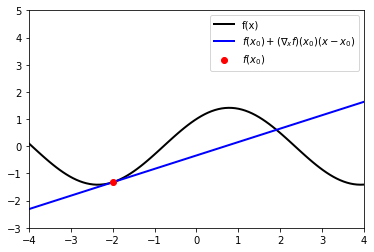

In [15]:
import matplotlib.pyplot as plt

plt.plot(xs, fLam(xs), lw = 2, color = 'k', zorder = 1, label = 'f(x)')
plt.scatter(point, fLam(point), color = 'r', zorder = 2, label = r'$f(x_0)$')
plt.plot(xs, derived, lw = 2, color = 'b', zorder =1, label = r'$f(x_0) + (\nabla_xf)(x_0)(x-x_0)$')
plt.axis([-4, 4, -3, 5])
plt.legend(loc = 1);

3.1.1 Use the Harvard Autograd library

grad and jacobian take a function as their argument.

More information: https://github.com/HIPS/autograd



In [16]:
import autograd.numpy as np # a concise version of numpy
from autograd import grad, jacobian

x = np.array([5, 3], dtype = float)

def cost(x):
    return x[0] ** 2 / x[1] - np.log(x[1])

gradient_cost = grad(cost)
jacobian_cost = jacobian(cost)
gradient_cost(x)
jacobian_cost(np.array([x, x, x]))


array([[[ 2.        ,  0.        ],
        [-1.2       ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  2.        ],
        [ 0.        , -1.33333333],
        [ 0.        ,  0.        ]]])

3.1.2 Or use the jacobian method available for matrices in sympy

In [17]:
from sympy import sin, cos, Matrix
from sympy.abc import rho, phi

X = Matrix([rho * cos(phi), rho * sin(phi), rho ** 2])
Y = Matrix([rho, phi])
X.jacobian(Y)


Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)],
[   2*rho,             0]])